In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

In [362]:
data = pd.read_csv("data/vectorized_data.csv").set_index("Date")
data.head(5)

,open,high,low,close,volume_match,0,1,2,3,4,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-04,40.645833,41.158333,40.279167,40.741667,9.763350e+06,-0.092606,0.062409,0.237025,-0.036062,-0.233786,...,0.353269,0.047901,-0.059821,-0.106256,0.176114,0.184447,0.199355,-0.218281,0.001663,0.062201
2022-01-05,40.754167,41.158333,40.104167,40.333333,8.901967e+06,-0.099912,0.118688,0.281551,-0.075379,-0.179596,...,0.363979,0.080938,-0.085433,-0.040547,0.181669,0.321050,0.207997,-0.118272,0.272090,0.031533
2022-01-06,40.029167,40.900000,39.575000,40.237500,1.082330e+07,-0.221465,0.029951,0.167762,-0.166090,-0.152490,...,0.373005,0.042850,-0.038987,-0.025165,0.268455,0.193360,0.141393,-0.099863,0.147399,-0.049824
2022-01-07,40.279167,40.616667,39.529167,39.904167,8.243367e+06,-0.045145,0.045843,0.230100,-0.084379,-0.187044,...,0.303724,0.161827,-0.036497,-0.094331,0.260187,0.276659,0.173292,-0.129082,0.047220,-0.072790
2022-01-10,39.850000,40.320833,39.029167,39.333333,7.876750e+06,-0.108038,-0.048060,0.250743,-0.111458,-0.270473,...,0.396304,0.108267,0.020713,-0.055575,0.307021,0.221502,0.178954,-0.255042,0.024329,0.045737


##### TRAIN DATE: START -> 2023-12-31
##### VAL DATE: 2024-01-01 -> 2024-05-01
##### TEST DATE: 2024-05-02 -> END 

In [363]:
train_data = data.loc[:"2023-12-31"]
train_data.shape

(498, 105)

In [364]:
validate_data = data.loc["2024-01-01": "2024-05-01"]
validate_data.shape

(78, 105)

In [365]:
test_data = data.loc["2024-05-02":]
test_data.shape

(71, 105)

In [366]:
scaler1 = MinMaxScaler(feature_range=(0,1))
train_data.iloc[:, :5] = scaler1.fit_transform(train_data.iloc[:, :5])
validate_data.iloc[:, :5] = scaler1.transform(validate_data.iloc[:, :5])
test_data.iloc[:, :5] = scaler1.transform(test_data.iloc[:, :5])

/tmp/ipykernel_36764/4077545355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.iloc[:, :5] = scaler1.fit_transform(train_data.iloc[:, :5])
/tmp/ipykernel_36764/4077545355.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_data.iloc[:, :5] = scaler1.transform(validate_data.iloc[:, :5])
/tmp/ipykernel_36764/4077545355.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.iloc[:, :5] = scaler1.transform(t

In [367]:
# scaler2 = MinMaxScaler(feature_range=(0,1))
# train_data_scaled = scaler2.fit_transform(train_data.iloc[:,12:])
# validate_data_scaled = scaler2.transform(validate_data.iloc[:,12:])
# test_data_scaled = scaler2.transform(test_data.iloc[:,12:])

In [368]:
n_components = 8
pca = PCA(n_components=n_components)
train_data_scaled = pca.fit_transform(train_data.iloc[:, 5:])
validate_data_scaled = pca.transform(validate_data.iloc[:, 5:])
test_data_scaled = pca.transform(test_data.iloc[:, 5:])

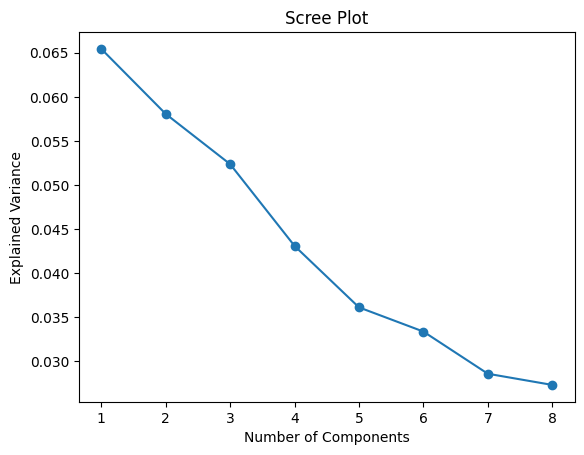

In [369]:
explained_variance = pca.explained_variance_ratio_
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.show()

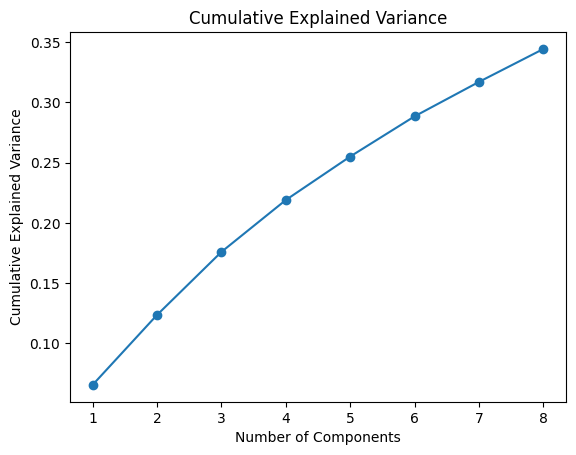

In [370]:
cumulative_explained_variance = np.cumsum(explained_variance)
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

In [371]:
train = np.concatenate([train_data.iloc[:, :5], train_data_scaled], axis=1)
validate = np.concatenate([validate_data.iloc[:, :5], validate_data_scaled], axis=1)
test = np.concatenate([test_data.iloc[:, :5], test_data_scaled], axis=1)

In [372]:
def set_seed(seed: int = 42) -> None:
  random.seed(seed)
  np.random.seed(seed)
  tf.random.set_seed(seed)
  tf.experimental.numpy.random.seed(seed)
  # Set a fixed value for the hash seed
  os.environ["PYTHONHASHSEED"] = str(seed)
  print(f"Random seed set as {seed}")

In [373]:
set_seed(0)

Random seed set as 0


In [374]:
train_data = pd.DataFrame(train)
train_data = train_data.rename(columns=dict(zip(train_data.columns[:5], ["Open", "High", "Low", "Close", "Volume"])))
validate_data = pd.DataFrame(validate)
validate_data = validate_data.rename(columns=dict(zip(validate_data.columns[:5], ["Open", "High", "Low", "Close", "Volume"])))
test_data = pd.DataFrame(test)
test_data = test_data.rename(columns=dict(zip(test_data.columns[:5], ["Open", "High", "Low", "Close", "Volume"])))

In [375]:
def split_sequence(X_data, y_data,n_steps):
    X, y = list(), list()
    for i in range (len(y_data)):
        end_ix = i + n_steps
        if end_ix > len(y_data) - 1:
            break
        seq_x, seq_y = X_data[i:end_ix, :], y_data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [376]:
features = 5
n_days = 10

X_train_ohlcv, y_train = split_sequence(np.array(train_data[["Open", "High", "Low", "Close", "Volume"]]), train_data["Close"], n_days)
print(X_train_ohlcv.shape, y_train.shape)

X_train_embbeded, y_train = split_sequence(np.array(train_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), train_data["Close"], n_days)
print(X_train_embbeded.shape, y_train.shape)

(488, 10, 5) (488,)
(488, 10, 8) (488,)


In [377]:
X_validate_ohlcv, y_validate = split_sequence(np.array(validate_data[["Open", "High", "Low", "Close", "Volume"]]), validate_data["Close"], n_days)
X_validate_ohlcv.shape, y_validate.shape

X_validate_embbeded, y_validate = split_sequence(np.array(validate_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), validate_data["Close"], n_days)
X_validate_embbeded.shape, y_validate.shape

((68, 10, 8), (68,))

In [378]:
X_test_ohlcv, y_test = split_sequence(np.array(test_data[["Open", "High", "Low", "Close", "Volume"]]), test_data["Close"], n_days)
X_test_ohlcv.shape, y_test.shape

X_test_embbeded, y_test = split_sequence(np.array(test_data.drop(columns=["Open", "High", "Low", "Close", "Volume"])), test_data["Close"], n_days)
X_test_embbeded.shape, y_test.shape

((61, 10, 8), (61,))

In [379]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
# Define the shapes of your input data
shape_1 = (X_train_ohlcv.shape[1], X_train_ohlcv.shape[2])  # Shape of the first input
shape_2 = (X_train_embbeded.shape[1], X_train_embbeded.shape[2])  # Shape of the second input

# Define the input layers
input_1 = Input(shape=shape_1)
input_2 = Input(shape=shape_2)

# Define the RNN layers for each input
rnn_1 = LSTM(128)(input_1)
rnn_2 = LSTM(12)(input_2)

# Merge the outputs of the RNN layers
merged = tf.keras.layers.concatenate([rnn_1, rnn_2])

# Add additional layers for further processing
dense1 = Dense(8, activation='relu')(merged)
output = Dense(1, activation='linear')(merged)

# Create the model
model = Model(inputs=[input_1, input_2], outputs=output)
# optimizer = SGD(lr=1e-3, momentum=0.9,decay=1e-2/500)
# Compile the model
model.compile(optimizer = 'RMSprop', loss='MSE')

# Print a summary of the model architecture
model.summary()


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_26      │ (None, 10, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_27      │ (None, 10, 8)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_26 (LSTM)      │ (None, 128)       │     68,608 │ input_layer_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_27 (LSTM)      │ (None, 12)        │      1,008 │ input_layer_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 140)       │          0 │ lstm_26[0][0],    │
│ (Concatenate)       │                   │            │ lstm_27[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │        141 │ concatenate_13[0… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 69,757 (272.49 KB)

 Trainable params: 69,757 (272.49 KB)

 Non-trainable params: 0 (0.00 B)

In [380]:
y_train = np.atleast_2d(y_train).T
y_train.shape

(488, 1)

In [381]:
# Train the model
history = model.fit([X_train_ohlcv, X_train_embbeded], y_train, epochs=1000, batch_size=24, validation_data=([X_validate_ohlcv, X_validate_embbeded], y_validate))

Epoch 1/1000


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.0709 - val_loss: 0.0080
Epoch 2/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0078 - val_loss: 0.0067
Epoch 3/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - val_loss: 0.0062
Epoch 4/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0053 - val_loss: 0.0061
Epoch 5/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0047 - val_loss: 0.0060
Epoch 6/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0043 - val_loss: 0.0058
Epoch 7/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0040 - val_loss: 0.0056
Epoch 8/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0036 - val_loss: 0.0054
Epoch 9/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 10/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 11/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 12/1000
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0

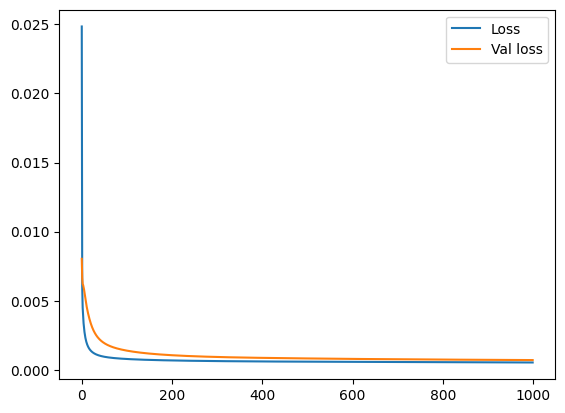

In [382]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Val loss")

plt.legend()
plt.show()

In [383]:
y_pred = model.predict([X_test_ohlcv, X_test_embbeded])
# y_pred = scaler1.inverse_transform(y_pred)
# y_test = scaler1.inverse_transform(y_test)
r2_score(y_test, y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


0.8166418275764832

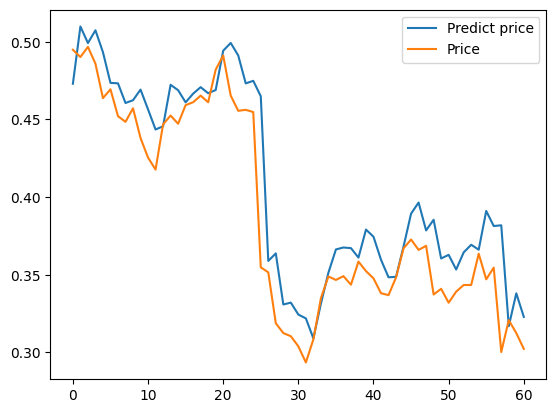

In [384]:
plt.plot(y_pred, label = "Predict price")
plt.plot(y_test, label = "Price")
plt.legend()
plt.show()